In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualise_mle_prediction(dataframe, no_features, first_feature, last_feature, location_line, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature],
                     linewidth=1,
                     color="black")
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=2)
        
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )   

# Visualisation and Evaluation of Prediction
## Failures

In [3]:
failures = [3907068,3915068,3916348,3916820,3918308,3937492,
           3940156,3958952,3962388,3968456,3970900,3971424,
           3973348,8059956,8072052,81052258,8123030,8124434,
           8124986,8125434,8127122,8132486,8136006]

## Examples of predictions before failures 

In [8]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_large_degradation.csv", sep=";")
artifical_data = artifical_data.iloc[:2000,:]

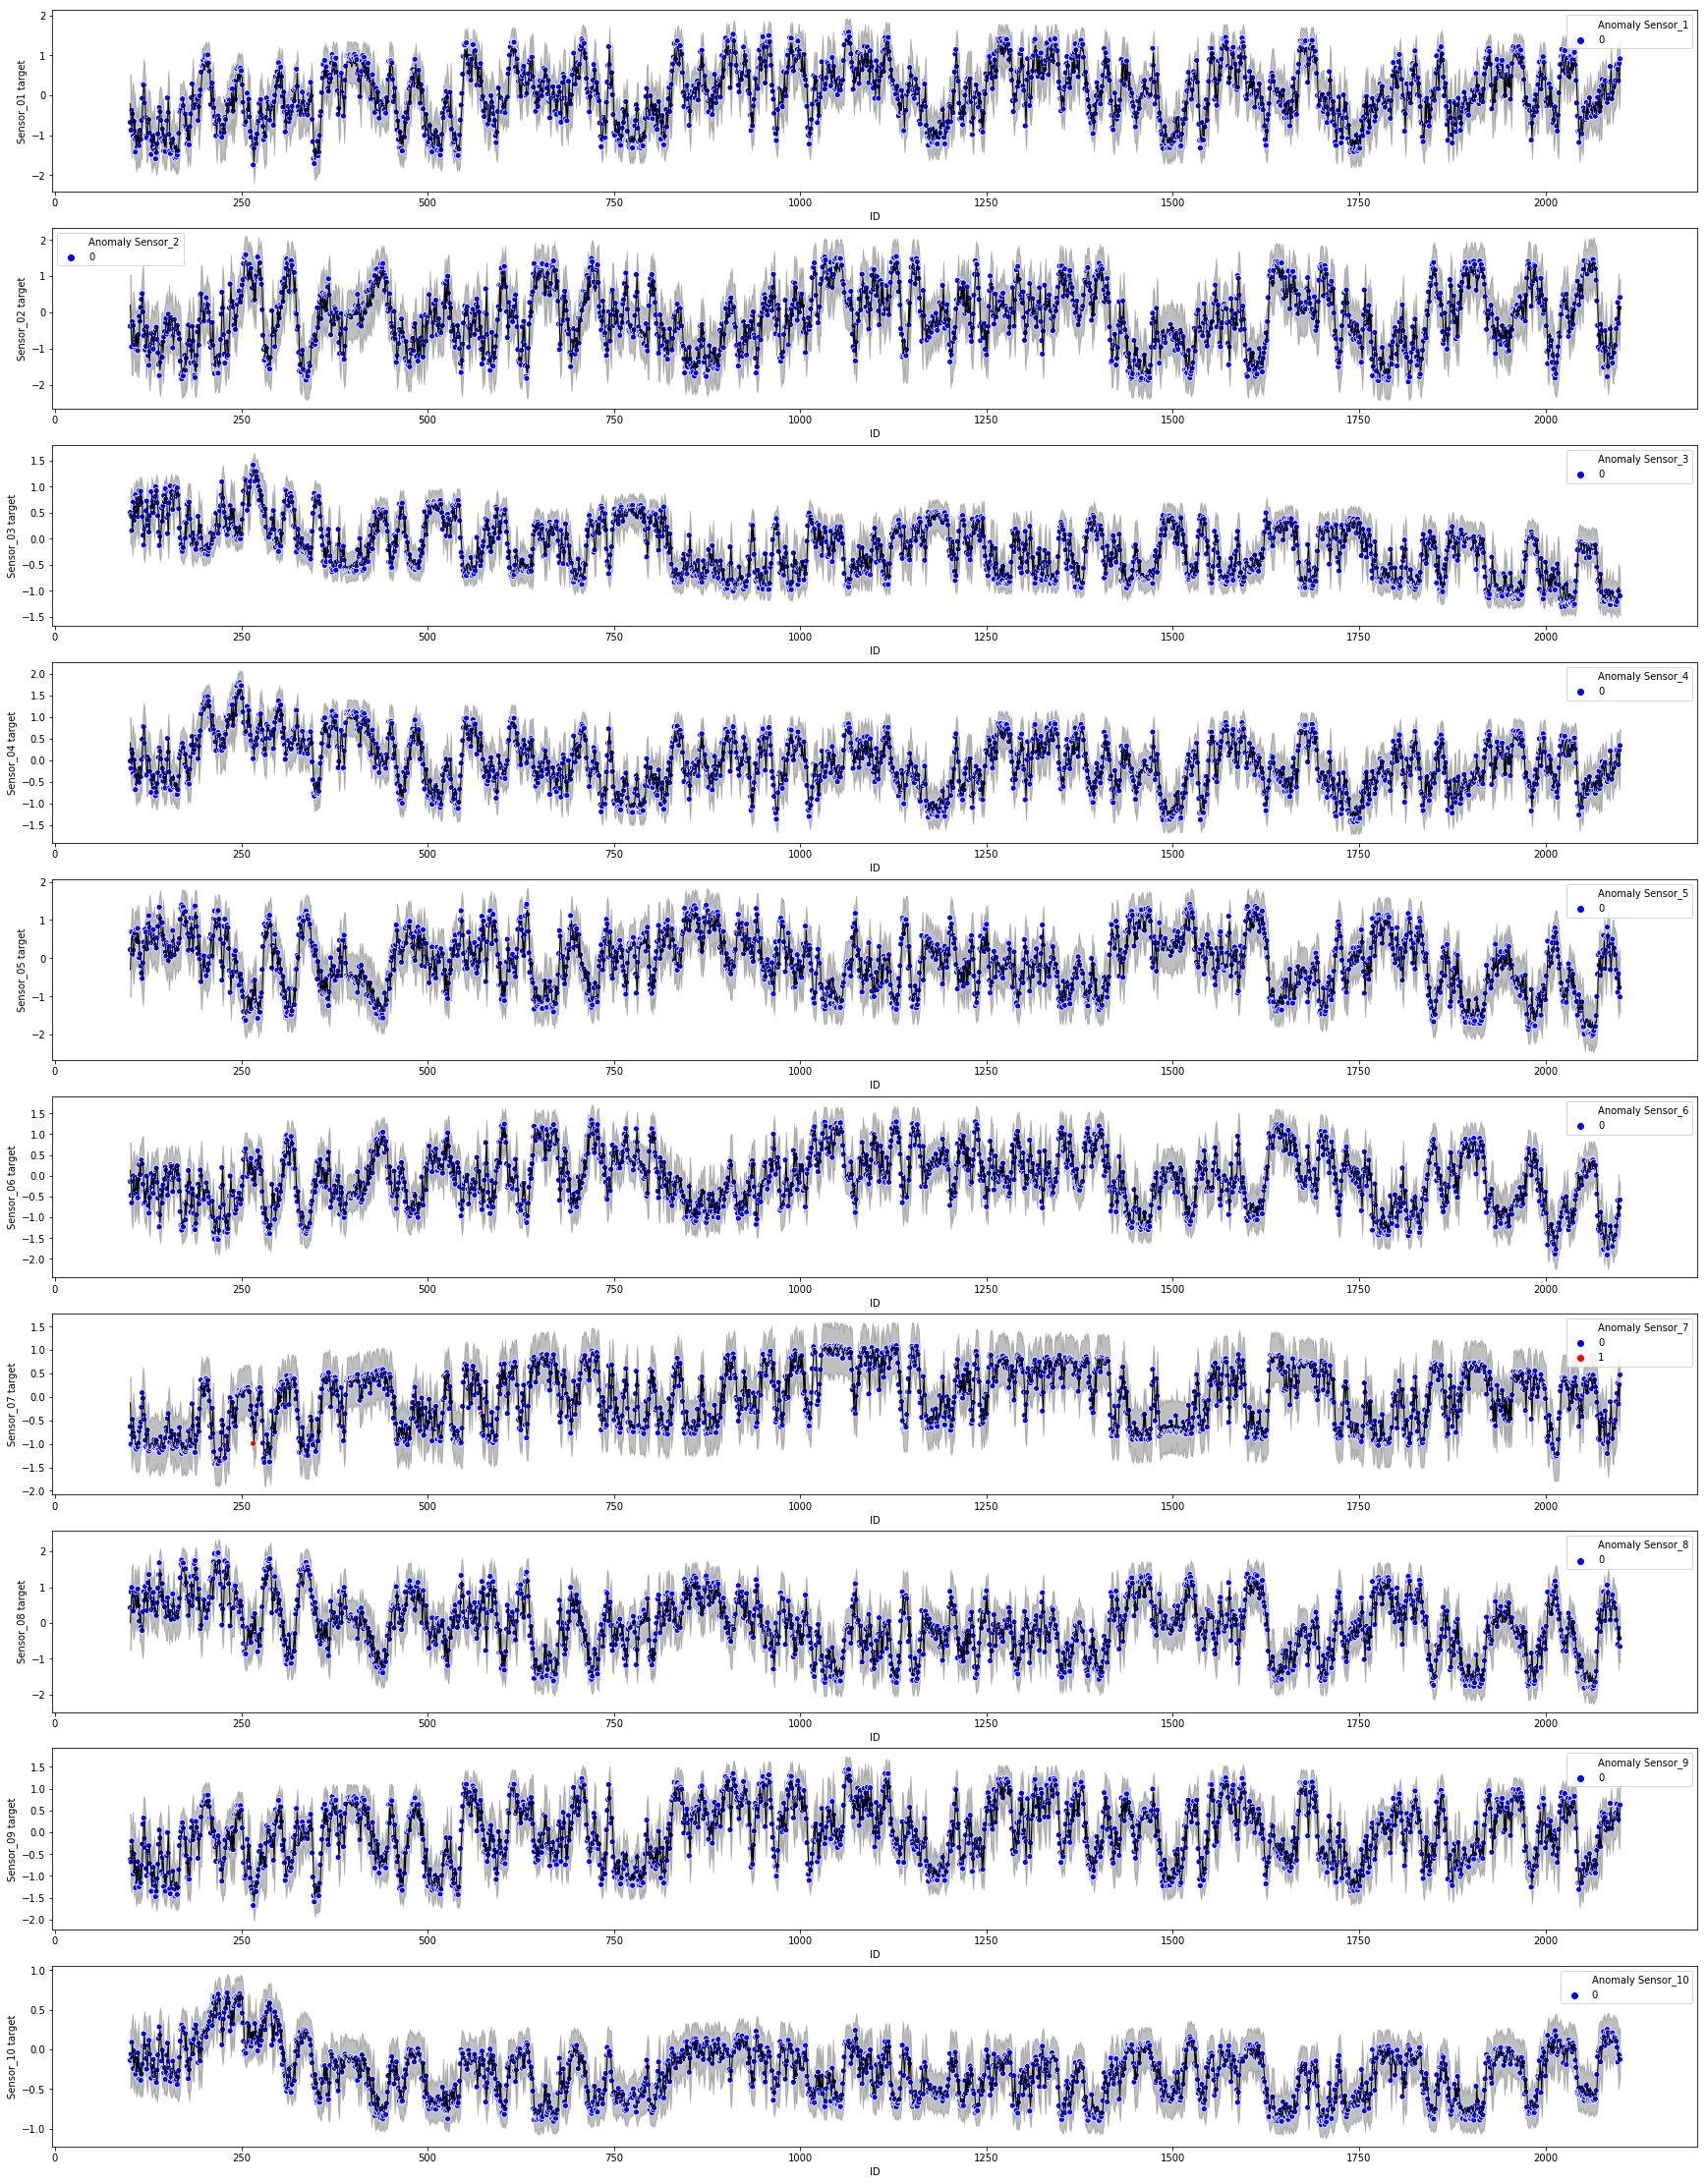

In [10]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = False,
                         location_line = start_phase_1
                        )
plt.show()

## Evaluation Metrics

In [5]:
all_data = pd.read_csv("../../files/prediction/MLE/cpps_large_degradation.csv", sep=";")

In [6]:
def vis_anomaly_detection(dataframe, no_features, first_feature, last_feature, location_line1, location_line2):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+4*no_features+1].cumsum(),
                     ax=ax[i-first_feature],
                     color="blue",)
        ax[i-first_feature].set_ylim(0, 5000) 
        ax[i-first_feature].axvline(location_line1, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].axvline(location_line2, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].text(10000, 4000, "Phase 0: No Error", fontsize=15)
        ax[i-first_feature].text(27000, 4000, "Phase 1: Small Error", fontsize=15)
        ax[i-first_feature].text(40000, 4000, "Phase 2: Large Error", fontsize=15)

### Cumulative Sum of Anomaly, labeld by LSTM-Model

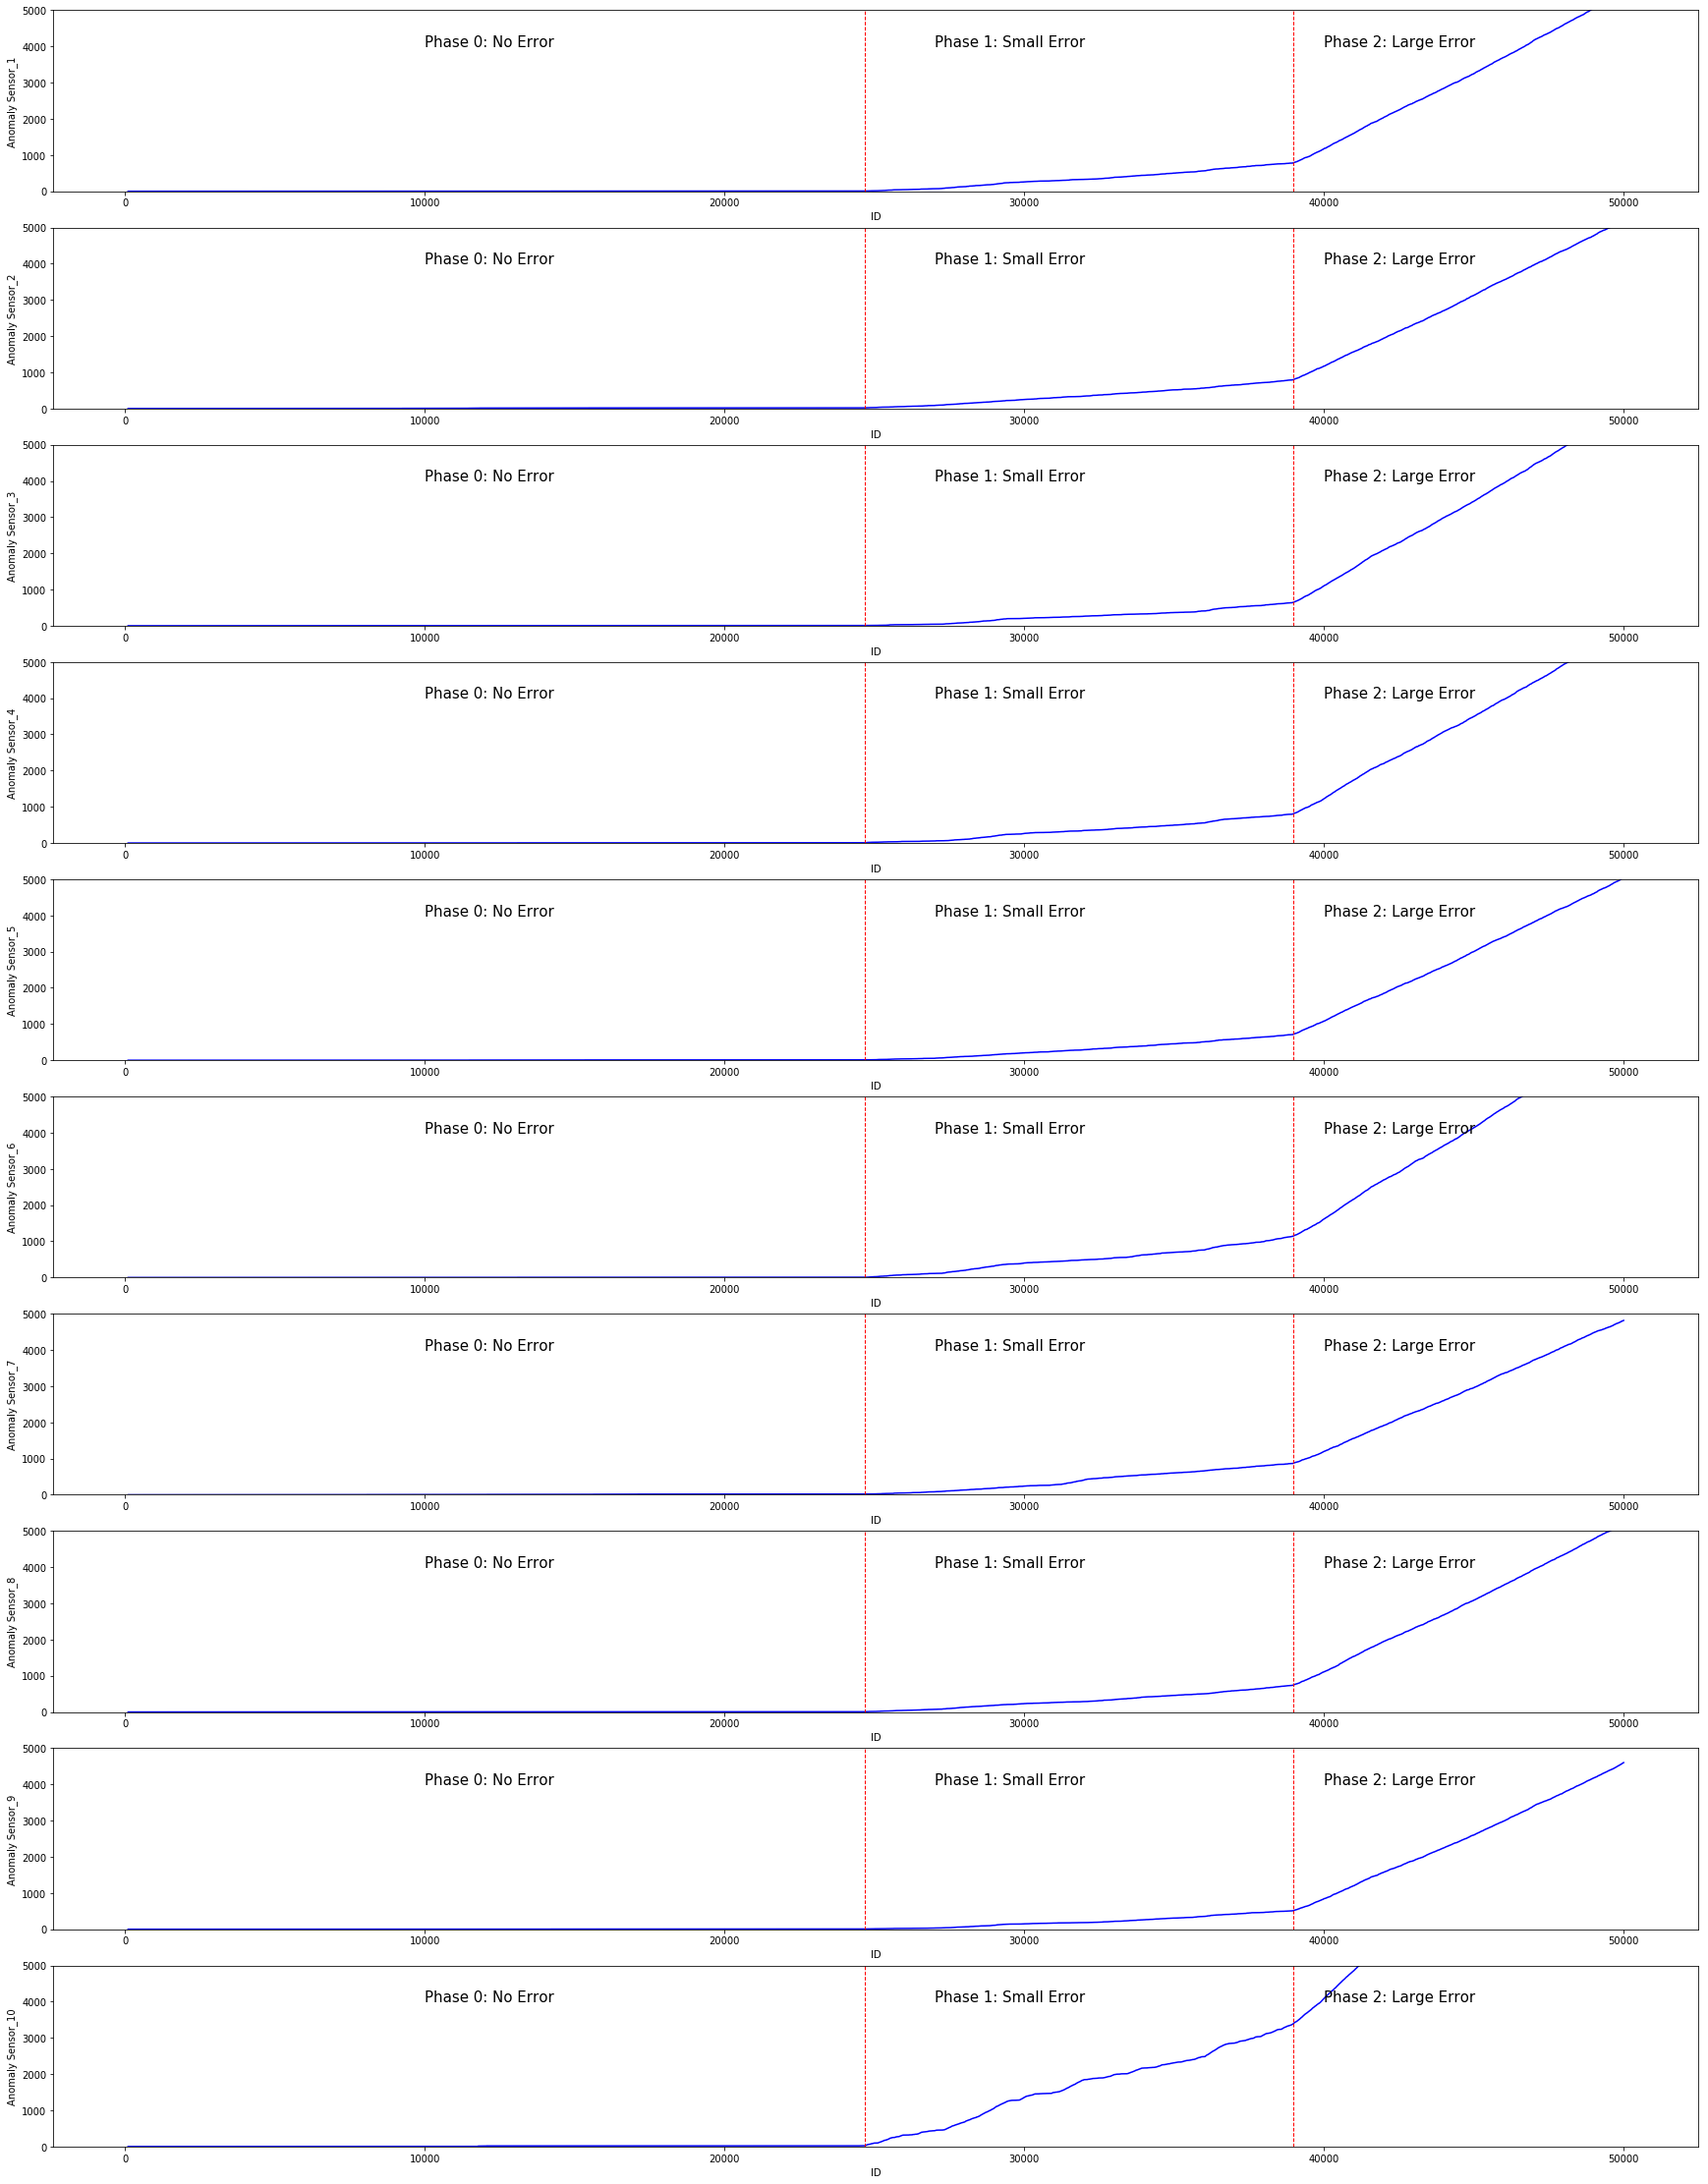

In [30]:
dataset_phase_0 = all_data.loc[all_data.status == 0]
vis_anomaly_detection(all_data, 10, 1, 11, start_phase_1, start_phase_2)
plt.show()